In [13]:
%matplotlib inline

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
tfrecord_path_train =  'D:\Coco\coco_train.tfrecord'
tfrecord_path_val =  'D:\Coco\coco_val.tfrecord'

In [3]:
image_feature_description  = {
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64),
}

In [4]:
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

In [9]:
raw_dataset = tf.data.TFRecordDataset(tfrecord_path_train)

parsed_dataset = raw_dataset.map(_parse_image_function)

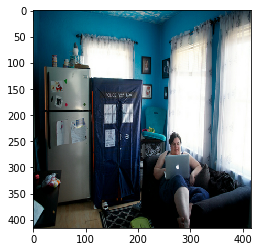

In [46]:
for image_features in parsed_dataset.take(564):
#     image_raw = tf.image.decode_jpeg(image_features['image/encoded']).numpy()

    x_train = tf.image.decode_jpeg(image_features['image/encoded'], channels=3)

    #   Note resize changes the uint into floats making it non-plottable 
    x_train = tf.image.resize(x_train, (416, 416))
    
    print_img(x_train)
    
    

In [43]:
def print_img(img):
    imgplot = plt.imshow(x_train.numpy().astype(dtype='uint8'))